<IPython.core.display.Javascript object>


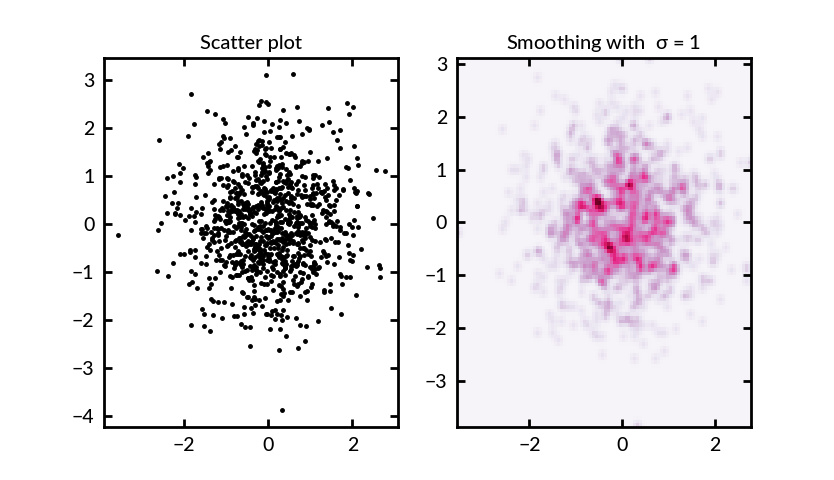

In [24]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.ndimage.filters import gaussian_filter

def mk_heatmap(x, y, s, bins=1000):
    ''' Creates a smoothed heatmap given a large set of x,y positions.
    
    x, y -- the data
    s -- the sigma or the number of pixels overwhich to smooth the data
    bins -- the total number of bins across the x and y axes in the image
    
    Returns:
    The smoothed heatmap image
    The image's extent (useful for plotting)
    The bins along the x axis
    The bins along the y axis
    
    '''
    
    
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=bins, range=[[x.min(), x.max()], [y.min(), y.max()]])
    heatmap = gaussian_filter(heatmap, sigma=s)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    return heatmap.T, extent, xedges, yedges

def value_heatmap(x, y, xbins, ybins, heatmap):
    ''' Calculates the smoothed value of the heatmap at the given x,y position
    
    x, y -- position to measure the heatmap
    xbins -- the heatmap x bins
    ybins -- the heatmap y bins
    heatmap -- the values of the heatmap
    
    Returns:
    The heatmap's value at the given x, y position.
    
    '''


    xbin = np.digitize(x, xbins[1: -1])
    ybin = np.digitize(y, ybins[1: -1])

    return heatmap[ybin][xbin]

fig, axs = plt.subplots(1, 2)

# Generate some test data
np.random.seed(1234)
x = np.random.randn(1000)
y = np.random.randn(1000)

sigmas = [0, 1]

for ax, s in zip(axs.flatten(), sigmas):
    if s == 0:
        ax.plot(x, y, 'k.', markersize=5)
        ax.set_title("Scatter plot")
    else:
        img, extent, xedges, yedges = mk_heatmap(x, y, s, bins=100)
        ax.imshow(img, extent=extent, origin='lower', cmap=cm.PuRd)
        ax.set_title("Smoothing with  $\sigma$ = %d" % s)

In [25]:
value_heatmap(0.5413, 1.4404, xedges, yedges, img)

0.3838459056857143

In [13]:
xedges

array([-3.56351666, -3.24714862, -2.93078059, -2.61441255, -2.29804451,
       -1.98167648, -1.66530844, -1.3489404 , -1.03257236, -0.71620433,
       -0.39983629, -0.08346825,  0.23289978,  0.54926782,  0.86563586,
        1.18200389,  1.49837193,  1.81473997,  2.13110801,  2.44747604,
        2.76384408])